### Import the libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

### Display the image

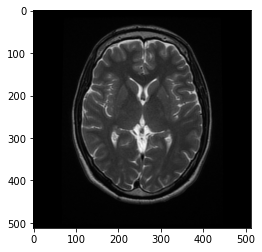

In [26]:
image = mpimg.imread('D:/ComputerVision/images/brain_MR.jpg')
image_copy = np.copy(image)

#convert the image from BGR to Gray
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
plt.imshow(image_copy, cmap= 'gray')


### Gaussian blur the image

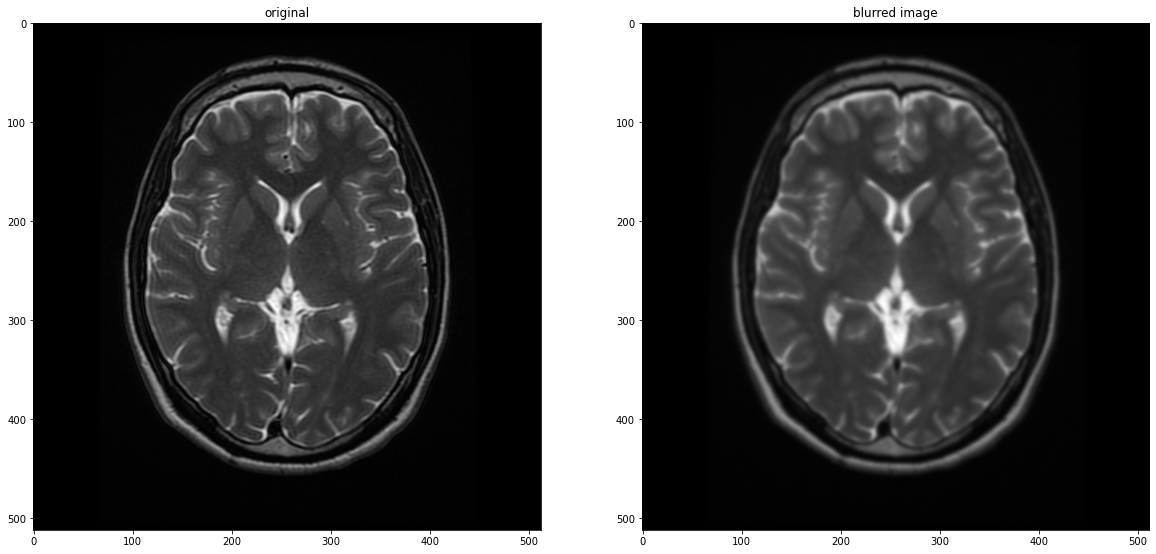

In [29]:
#using gaussian blur to block the tiny high frequency
blur = cv2.GaussianBlur(image_copy, (9,9), 0)

#plot the original and the blurred image
f,(ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.set_title('original')
ax1.imshow(image_copy, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(blur, cmap='gray')


### Test performance with a high-pass filter

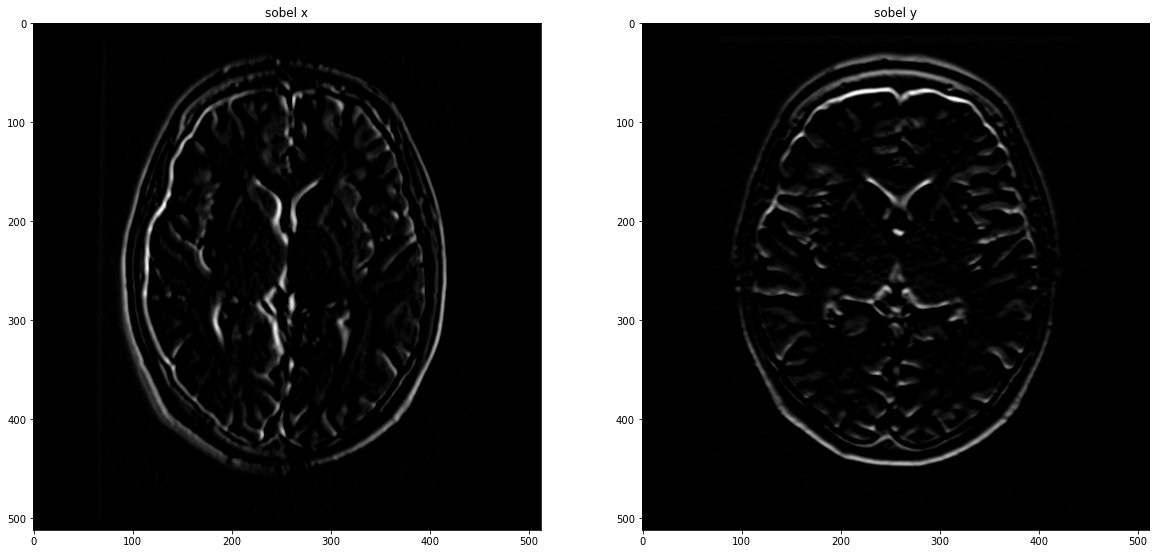

In [30]:
#sobel_x to filter vertically
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

#sobel_y to filter horizontally
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

#appply the filter to the blurred image
fitlered_x = cv2.filter2D(blur, -1, sobel_x)
filtered_y = cv2.filter2D(blur, -1, sobel_y)

#display the filtered blurred image
f,(ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.set_title('sobel x')
ax1.imshow(fitlered_x, cmap='gray')

ax2.set_title('sobel y')
ax2.imshow(filtered_y, cmap='gray')

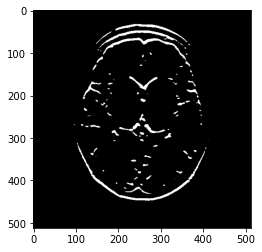

In [31]:
#create threshold that sets all the filtered pixels to white
retval, binary_image = cv2.threshold(filtered_y, 50,255, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray')